# Adding required Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import os

# Adding Data

In [2]:
df = pd.read_csv('data/a_to_z_handwritten_data_updated_smaller.csv')

In [3]:
df.shape

(10000, 785)

In [4]:
df.head()

0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]

# Changing label

The zero collumn is our label, but it is in integer form, So changeing it

In [5]:
label = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}
df.iloc[:,0] = df.iloc[:,0].map(label)

In [6]:
x = df.drop(df.columns[0],axis=1) # Droping the label column
y = df.iloc[:,0].copy() # Copying the label column

In [7]:
# Creating numpy array
x = np.array(x)
y = np.array(y)

# Printing a data

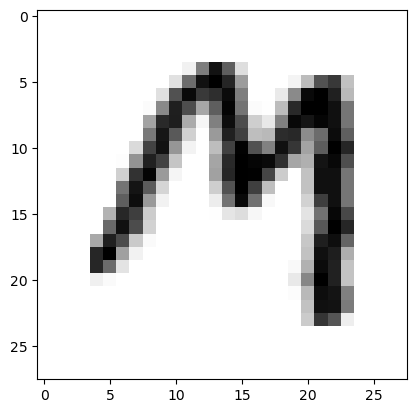

In [8]:
sample_data = x[3000]
sample_image = sample_data.reshape(28,28)
plt.imshow(sample_image,cmap=matplotlib.cm.binary,interpolation="nearest")

In [9]:
y[3000]

'M'

Here we see sample data is 'A' as we also see in our figure

# Train test spliting

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,stratify = y,random_state = 42)
x_train.shape,x_test.shape

((8000, 784), (2000, 784))

# Model training

I use KNN Classifier

In [11]:
model = KNeighborsClassifier(n_neighbors = 1,weights = 'distance')
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1, weights='distance')

In [12]:
y_pred = model.predict(x_test)

# Accuracy and Confusion Matrix

In [13]:
print("The accuracy of model is : ",accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

The accuracy of model is :  0.9035


array([[ 68,   0,   0,   0,   0,   0,   1,   1,   0,   0,   1,   1,   0,
          0,   0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0],
       [  1,  35,   2,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   3,   2,   0,   0,   2,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0, 118,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
          0,   5,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   1],
       [  1,   0,   0,  35,   0,   0,   0,   0,   0,   0,   0,   1,   0,
          0,  13,   2,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0],
       [  0,   0,   3,   0,  57,   0,   0,   0,   0,   0,   0,   1,   0,
          0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   4,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   1,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   3,   0,   0,   0,  25,   0,   0,   0,   0,   0,   0,
          0,   2,   0,   0,   0,   1,   0,   

# Plotting some predictions

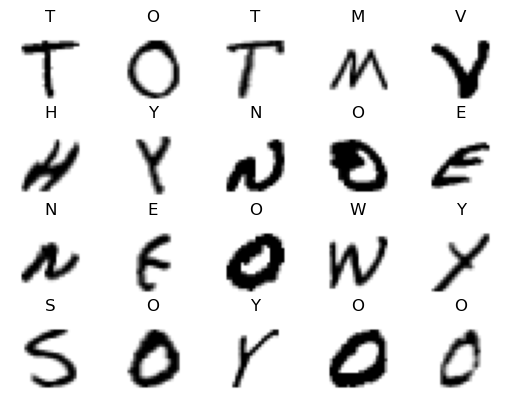

In [14]:
from numpy import random
for i in range(1,21):
    a = random.randint(len(x_test))
    img = x_test[a]
    img_res = img.reshape(28,28)
    plt.subplot(4,5,i)
    plt.imshow(img_res, cmap='binary')
    plt.axis('off')
    plt.title(y_test[a])
plt.show()